In [1]:
import os
import os.path
import sys
sys.path.insert(0, os.path.join(os.pardir, 'sparat'))

import matplotlib.pyplot as plt
import numpy as np
import psyrun.io
import seaborn as sns

from data_processing.rat import load_rat_items
from data_processing.generate_association_matrix import load_assoc_mat

%matplotlib inline

In [2]:
data = psyrun.io.load_dict_h5(os.path.join(os.pardir, 'data', 'neural-accuracy.h5'))
data.keys()

['m_sim', 'seed', 'neurons_per_dimension']

In [3]:
data['m_sim']

array([ 0.01057695,  0.01400358,  0.01205835,  0.01028014,  0.01093397,
        0.01005298,  0.01284254,  0.01485554,  0.00985808,  0.01139643])

In [4]:
sorting = np.argsort(data['neurons_per_dimension'])

In [6]:
sns.set('paper', 'ticks')

column_width_pt = 243.91125
pt2inch = 1. / 72.27
column_width_inch = pt2inch * column_width_pt

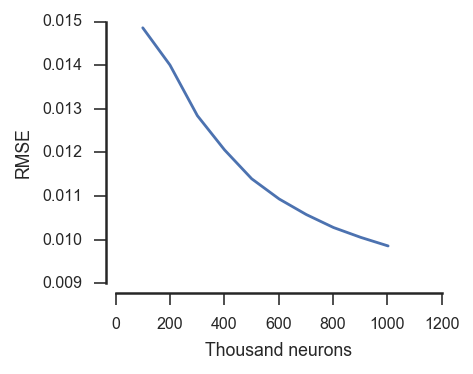

In [7]:
fig = plt.figure(figsize=(column_width_inch, 0.8 * column_width_inch))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data['neurons_per_dimension'][sorting] * 5018 * 4 / 1000, data['m_sim'][sorting])
ax.set_xlabel("Thousand neurons")
ax.set_ylabel("RMSE")

sns.despine(offset=5)
fig.tight_layout()

In [13]:
fig.savefig(os.path.join(os.pardir, 'txt', 'cogsci-paper', 'figures', 'accuracy.pdf'))

In [9]:
rat_items = load_rat_items(os.path.join(os.pardir, 'data', 'rat', 'example.txt'))

In [11]:
assoc, i2w, w2i = load_assoc_mat(os.path.join(
    os.pardir, 'data', 'associationmatrices'), 'freeassoc_asymmetric')

In [23]:
ground_truth = np.array([np.sum([assoc[w2i[c]] for c in item.cues], axis=0) for item in rat_items]) / 3.

[ 0.66596772  0.62935284  0.62836163]


In [22]:
relative_rmse = data['m_sim'] / np.sqrt(np.mean(np.square(np.max(ground_truth, axis=1))))
print relative_rmse[sorting]

[ 0.04456661  0.04201075  0.03852762  0.03617506  0.03418928  0.0328019
  0.03173084  0.03084043  0.03015893  0.02957423]
